In [2]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Step 1: Load VGG16 model pre-trained on ImageNet dataset
base_model = VGG16(weights='imagenet', include_top=False)


In [4]:
# Step 2: Function to extract features using VGG16
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = base_model.predict(x)
    return features.flatten()
# Output is a flattened 1D array

In [5]:
# Step 3: Data Augmentation (Rotation, width/height shifts, shear, zoom, horizontal flip)
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [6]:
# Function to augment images and extract features
def augment_and_extract_features(img_path, label):
    features = []
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    for _ in range(5):  # Generate 5 augmented images
        aug_img = next(datagen.flow(x, batch_size=1)) # Apply random transformations
        aug_img = preprocess_input(aug_img) # Preprocess the augmented image
        feature = base_model.predict(aug_img) 
        features.append(feature.flatten()) # Extract and store the features for each augmented image
    return features, [label] * 5 # Return features and corresponding labels

In [7]:
# Load dataset and extract features
actor_features = []
labels = []
actor_dir = "D:\\Programming\\Project\\dataset_3\\amitabh_bachchan"

In [8]:
for actor_image in os.listdir(actor_dir):
    features, label = augment_and_extract_features(os.path.join(actor_dir, actor_image), 1)
    actor_features.extend(features)
    labels.extend(label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [36]:
test_features = []
test_labels = []
other_actors_dir = "D:\\Programming\\Project\\test"
for other_actor_image in os.listdir(other_actors_dir):
    features, label = augment_and_extract_features(os.path.join(other_actors_dir, other_actor_image), 0)
    test_features.extend(features)
    test_labels.extend(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1

In [37]:
# def create_list(n):
#   """Initializes a list with numbers from 0 to n (inclusive)."""
#   numbers = []
#   for i in range(n + 1):
#     numbers.append(i)
#   return numbers

# Splitting the datasets

# Indices or identifiers of images you want to ensure are in the training set
# preassigned_train_indices = create_list(49)

# Extract the pre-assigned training features and labels
# preassigned_train_features = [actor_features[i] for i in preassigned_train_indices]
# preassigned_train_labels = [labels[i] for i in preassigned_train_indices]

# # Remove the pre-assigned training features and labels from the original lists
# remaining_features = [actor_features[i] for i in range(len(actor_features)) if i not in preassigned_train_indices]
# remaining_labels = [labels[i] for i in range(len(labels)) if i not in preassigned_train_indices]

In [38]:
X_train = []
y_train = []
X_test = []
y_test = []

# Combine the pre-assigned training data with the training data
X_train.extend(actor_features)
y_train.extend(labels)

# Optionally, shuffle the combined training set to ensure it's not ordered
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [39]:
X_test.extend(test_features)
y_test.extend(test_labels)

from sklearn.utils import shuffle
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [40]:
# Debugging prints
print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))

Number of training samples: 775
Number of test samples: 525


In [55]:
# Fit PCA and KNN on the training data
pca = PCA(n_components=100)  # Adjust the number of components as needed
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean')

# Create a pipeline for convenience
pipeline = Pipeline([
    ('pca', pca),
    ('knn', knn)
])

# Fit the pipeline on the training data
pipeline.fit(actor_features, labels)

Pipeline(steps=[('pca', PCA(n_components=100)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=4,
                                      weights='distance'))])

In [56]:
# The PCA and KNN are now fitted. We can use this pipeline to transform and predict the test data.
# Transform the test dataset using the fitted PCA
test_features_transformed = pca.transform(test_features)

# Get distances and indices of nearest neighbors for each test actor
predicted_distances, predicted_indices = knn.kneighbors(test_features_transformed, n_neighbors=4, return_distance=True)

# Extract the indices of top 4 actors with the smallest distance for each test image
resemblance_indices = np.argsort(predicted_distances, axis=1)[:, :4]

# Ensure not to go out of bounds
if len(resemblance_indices) < 4:
    resemblance_indices = np.argsort(predicted_distances, axis=1)[:, :len(predicted_distances[0])]

In [58]:
# Assuming 'other_actors_dir' contains the test images for comparison
other_actors_dir = "D:\\Programming\\Project\\test"
other_actor_images = os.listdir(other_actors_dir)

# Debug: Print number of test images
print("Number of test images:", len(test_features))

Number of test images: 525


In [59]:
# Debug: Print resemblance indices and check validity for the first test image
print("Resemblance Indices for the first test image:\n", resemblance_indices[0])

# Check if the indices are within bounds
for idx in resemblance_indices[0]:
    if idx >= len(other_actor_images):
        print(f"Index {idx} out of bounds for other_actor_images")

Resemblance Indices for the first test image:
 [0 1 2 3]


In [60]:
# Extracting the best actors' paths (adjust the logic to match the number of features per image)
# Since we generated 5 augmented images for each original image, we need to map the indices back to original images
unique_resemblance_indices = set(idx // 5 for idx in resemblance_indices[0])

# Debug: Print unique resemblance indices
print("Unique Resemblance Indices for the first test image:\n", unique_resemblance_indices)

Unique Resemblance Indices for the first test image:
 {0}


In [61]:
# Ensure indices are within bounds
valid_indices = [idx for idx in unique_resemblance_indices if idx < len(other_actor_images)]

# Debug: Print valid indices
print("Valid Indices for the first test image:\n", valid_indices)

Valid Indices for the first test image:
 [0]


In [62]:
# Extracting the best actors' paths
best_actors = [os.path.join(other_actors_dir, other_actor_images[idx]) for idx in valid_indices]

# Debug: Print best actors' paths
print("Best Actors' Paths for the first test image:\n", best_actors)

Best Actors' Paths for the first test image:
 ['D:\\Programming\\Project\\test\\006e1bcb09.jpg']


Displaying image: D:\Programming\Project\test\006e1bcb09.jpg


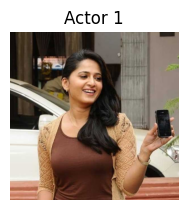

In [63]:
# Display the images
plt.figure(figsize=(10, 5))
for i, actor_image_path in enumerate(best_actors):
    print(f"Displaying image: {actor_image_path}")  # Debug print
    img = mpimg.imread(actor_image_path)
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Actor {i + 1}")
    plt.axis('off')
plt.show()

In [41]:
# Step 5: Dimensionality Reduction and Normalization
pipeline = Pipeline([
    ('pca', PCA(n_components=100)),  # Adjust the number of components as needed
    ('knn', KNeighborsClassifier())
])

In [42]:
# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [43]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=100)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']})

In [44]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

In [45]:
# Step 7: Evaluate the model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9238095238095239


In [46]:
# Step 8: Transform the actor features using PCA and predict the best 4 actors whose resemblance is similar to the trained actor/actress
pca = best_model.named_steps['pca']
knn = best_model.named_steps['knn']

In [47]:
# Transform the entire dataset using the fitted PCA
actor_features_transformed = pca.transform(actor_features)


In [48]:
# Get distances and indices of nearest neighbors for each actor
predicted_distances, predicted_indices = knn.kneighbors(actor_features_transformed, n_neighbors=4, return_distance=True)



In [49]:
# Debug: Print distances and indices
print("Predicted Distances:\n", predicted_distances)
print("Predicted Indices:\n", predicted_indices)

Predicted Distances:
 [[1.20631319e-05 4.51430268e+02 4.69216067e+02 4.76577328e+02]
 [0.00000000e+00 4.85368989e+02 5.06676161e+02 6.02890163e+02]
 [0.00000000e+00 4.85368989e+02 5.70830176e+02 7.48562339e+02]
 ...
 [1.86881236e-05 4.94548921e+02 5.34907512e+02 5.57995632e+02]
 [0.00000000e+00 4.95244621e+02 5.22599638e+02 5.93326395e+02]
 [1.07895932e-05 2.94528782e+02 5.83538944e+02 5.84030212e+02]]
Predicted Indices:
 [[352 228 134 748]
 [706 137 488 652]
 [137 706 652 352]
 ...
 [696  41 637 230]
 [316 343 153  59]
 [384  41  32 696]]


In [50]:
# Extract the indices of top 4 actors with the smallest distance
resemblance_indices = np.argsort(predicted_distances[:, 0])[:4]

In [51]:
# Ensure not to go out of bounds
if len(resemblance_indices) < 4:
    resemblance_indices = np.argsort(predicted_distances[:, 0])[:len(predicted_distances[:, 0])]

# Debug: Print number of images in other_actors_dir
other_actor_images = os.listdir(other_actors_dir)
print("Number of images in other_actors_dir:", len(other_actor_images))

# Debug: Print resemblance indices and check validity
for idx in resemblance_indices:
    if idx >= len(other_actor_images):
        print(f"Index {idx} out of bounds for other_actor_images")

# Extracting the best actors paths (adjust the logic to match the number of features per image)
# Since we generated 5 augmented images for each original image, we need to map the indices back to original images
unique_resemblance_indices = set(idx // 5 for idx in resemblance_indices)

# Debug: Print unique resemblance indices
print("Unique Resemblance Indices:\n", unique_resemblance_indices)

Number of images in other_actors_dir: 105
Index 270 out of bounds for other_actor_images
Index 350 out of bounds for other_actor_images
Index 627 out of bounds for other_actor_images
Index 628 out of bounds for other_actor_images
Unique Resemblance Indices:
 {70, 125, 54}


In [52]:
# Ensure indices are within bounds
valid_indices = [idx for idx in unique_resemblance_indices if idx < len(other_actor_images)]

# Debug: Print valid indices
print("Valid Indices:\n", valid_indices)

Valid Indices:
 [70, 54]


In [53]:
# Extracting the best actors paths
best_actors = [os.path.join(other_actors_dir, other_actor_images[idx]) for idx in valid_indices]

# Debug: Print best actors paths
print("Best Actors Paths:\n", best_actors)

Best Actors Paths:
 ['D:\\Programming\\Project\\test\\6a455c23dc.jpg', 'D:\\Programming\\Project\\test\\4d96564443.jpg']


Displaying image: D:\Programming\Project\test\6a455c23dc.jpg
Displaying image: D:\Programming\Project\test\4d96564443.jpg


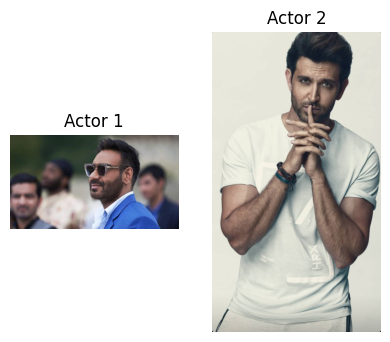

In [54]:
# Display the images
plt.figure(figsize=(10, 5))
for i, actor_image_path in enumerate(best_actors):
    print(f"Displaying image: {actor_image_path}")  # Debug print
    img = mpimg.imread(actor_image_path)
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Actor {i + 1}")
    plt.axis('off')
plt.show()